In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from itertools import product
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# load dataset 10

In [2]:
df = pd.read_csv('10_all_numerical.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137386 entries, 0 to 137385
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              137381 non-null  float64
 1   action_taken                              137386 non-null  int64  
 2   loan_type                                 137386 non-null  int64  
 3   lien_status                               137386 non-null  int64  
 4   reverse_mortgage                          137386 non-null  int64  
 5   open_end_line_of_credit                   137386 non-null  int64  
 6   loan_amount                               137386 non-null  int64  
 7   combined_loan_to_value_ratio              137091 non-null  float64
 8   interest_rate                             110401 non-null  float64
 9   total_loan_costs                          110401 non-null  float64
 10  origination_charges 

In [4]:
df.head()

,census_tract,action_taken,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,...,co_applicant_sex,applicant_age,co_applicant_age,aus_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_ethnicity_1,co_applicant_ethnicity_1
0,4.209120e+10,1,1,1,2,2,355000,75.822,6.0,8352.71,...,2,1,7,1,5.0,NaN,5.0,NaN,2.0,2.0
1,5.513320e+10,1,2,1,2,2,285000,84.777,6.0,6854.68,...,2,1,1,6,5.0,NaN,5.0,NaN,2.0,2.0
2,6.073010e+09,1,1,1,2,2,475000,54.091,4.0,2288.00,...,2,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN
3,2.712304e+10,1,1,1,2,2,185000,64.615,4.0,1881.10,...,1,0,0,6,5.0,NaN,5.0,NaN,2.0,2.0
4,4.849102e+10,1,1,1,2,2,225000,85.920,5.0,3434.50,...,2,1,1,6,5.0,NaN,5.0,NaN,2.0,2.0


In [5]:
columns_with_nan = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['census_tract', 'combined_loan_to_value_ratio', 'interest_rate', 'total_loan_costs', 'origination_charges', 'property_value', 'income', 'debt_to_income_ratio', 'applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2', 'applicant_ethnicity_1', 'co_applicant_ethnicity_1']


In [6]:
# Fill missing values with the mean for each column
for column in columns_with_nan:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

In [7]:
columns_with_nan = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [8]:
df.to_csv('12_removed_all_nan_with_mean.csv', index=False)

In [9]:
target_variable = "action_taken"

In [10]:
X = df.drop(columns=[target_variable])
y = df[target_variable]

In [11]:
print(X.shape, y.shape)

(137386, 35) (137386,)


In [12]:
seed = 123

In [13]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
cv = RepeatedStratifiedKFold(n_splits = 6, n_repeats = 3, random_state=seed)
n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv)

print('Mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model.fit(X, y)

y_pred = model.predict(X)

Mean accuracy: 0.804 (0.000)


In [14]:
accuracy = accuracy_score(y, y_pred)

print(classification_report(y, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89    110401
           3       0.00      0.00      0.00     26985

    accuracy                           0.80    137386
   macro avg       0.40      0.50      0.45    137386
weighted avg       0.65      0.80      0.72    137386



- for _class 1, precision is 0.80_, which means that _80%_ of the predictions for class 1 were correct, 
- and for _class 3, it's 0.00_, which means that _none_ of the predictions for class 3 were correct.

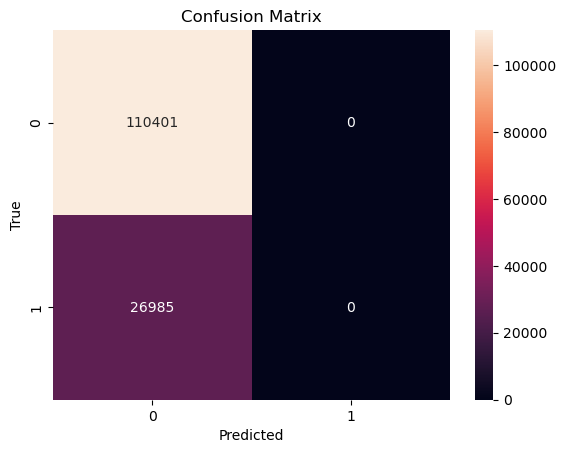

In [15]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Conclusion

The model cant predict class 3!